In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Student_Performance.csv')

In [3]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
df.shape

(10000, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [6]:
df.duplicated().sum()

127

In [7]:
# Identify and remove duplicate columns
df = df.loc[:, ~df.T.duplicated(keep='first')]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [9]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['Extracurricular Activities']=lb.fit_transform(df['Extracurricular Activities'])

In [10]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [11]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [12]:
X

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5
...,...,...,...,...,...
9995,1,49,1,4,2
9996,7,64,1,8,5
9997,6,83,1,8,5
9998,9,97,1,7,0


In [13]:
y

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [15]:
X_train

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
2694,3,64,0,5,1
5140,2,66,1,5,6
2568,3,91,0,5,1
3671,6,55,0,7,7
7427,8,47,0,7,1
...,...,...,...,...,...
2895,5,68,0,5,6
7813,3,45,1,7,4
905,8,93,0,9,0
5192,3,98,0,7,2


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
X_train_scaled

array([[0.25      , 0.40677966, 0.        , 0.2       , 0.11111111],
       [0.125     , 0.44067797, 1.        , 0.2       , 0.66666667],
       [0.25      , 0.86440678, 0.        , 0.2       , 0.11111111],
       ...,
       [0.875     , 0.89830508, 0.        , 1.        , 0.        ],
       [0.25      , 0.98305085, 0.        , 0.6       , 0.22222222],
       [0.25      , 0.23728814, 1.        , 0.4       , 0.33333333]])

In [18]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [19]:
model = Sequential()

model.add(Dense(5,activation='relu',input_dim=5))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='linear'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 30        
                                                                 
 dense_1 (Dense)             (None, 10)                60        
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 211 (844.00 Byte)
Trainable params: 211 (844.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
model.compile(loss='mean_squared_error',optimizer='Adam')

In [22]:
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 2942.5112 - val_loss: 1937.9476
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 520.2106 - val_loss: 189.6357
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 149.0284 - val_loss: 102.5366
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 76.8634 - val_loss: 48.5945
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 36.5487 - val_loss: 22.7276
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 18.4596 - val_loss: 12.3454
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 10.8584 - val_loss: 7.8300
Epoch 8/100
200/200 [==============================] - 0s 2ms/step - loss: 7.3279 - val_loss: 5.7771
Epoch 9/100
200/200 [==============================] - 0s 2ms/step - loss: 5.6760 - val_loss: 4.9838
Epoch 10/100
200/200 [==============================] - 0s 2ms/step - 

In [23]:
y_pred = model.predict(X_test_scaled)

63/63 [==============================] - 0s 2ms/step


In [24]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.988323167915531

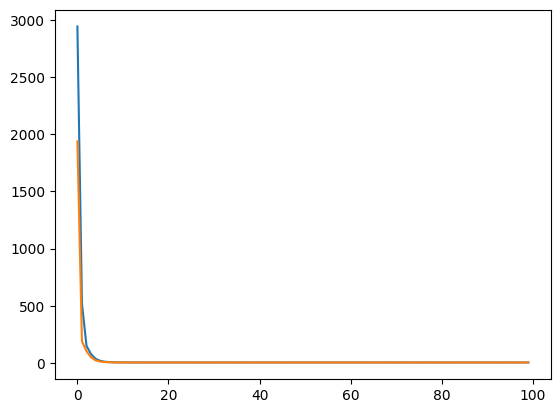

In [25]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])